In [1]:
# Подгрузка библиотек
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from sklearn import decomposition
from sklearn import metrics
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering

from sklearn.datasets import make_blobs

In [2]:
df = pd.read_csv("column_3C_weka.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


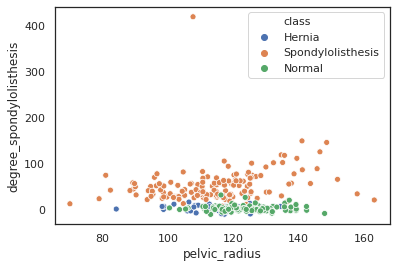

In [3]:
sns.scatterplot(x = 'pelvic_radius', y = 'degree_spondylolisthesis', hue = 'class', data = df)

In [4]:
to_drop = list(df)
to_drop

['pelvic_incidence',
 'pelvic_tilt',
 'lumbar_lordosis_angle',
 'sacral_slope',
 'pelvic_radius',
 'degree_spondylolisthesis',
 'class']

In [5]:
to_drop = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'class']
X = df.drop(to_drop, axis = 1)
X

,pelvic_radius,degree_spondylolisthesis
0,98.672917,-0.254400
1,114.405425,4.564259
2,105.985135,-3.530317
3,101.868495,11.211523
4,108.168725,7.918501
...,...,...
305,117.449062,-4.245395
306,114.365845,-0.421010
307,125.670725,-2.707880
308,118.545842,0.214750


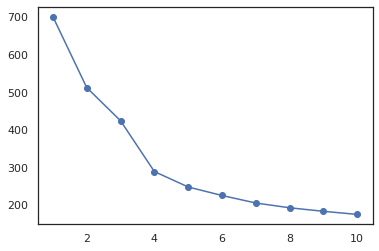

In [6]:
#расчет количества кластеров
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0)
    km.fit(X)
    distortions.append(np.sqrt(km.inertia_))

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.show()

In [7]:
km = KMeans(n_clusters = 4, init='random', n_init=10, max_iter = 300, random_state = 4)
km.fit(X)
x_km = km.fit_predict(X)
x_km

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 3, 2,
       2, 1, 3, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 3, 2, 2,
       3, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 3, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 0, 2, 1, 3, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [8]:
X['cluster'] = x_km
X

,pelvic_radius,degree_spondylolisthesis,cluster
0,98.672917,-0.254400,3
1,114.405425,4.564259,3
2,105.985135,-3.530317,3
3,101.868495,11.211523,3
4,108.168725,7.918501,3
...,...,...,...
305,117.449062,-4.245395,3
306,114.365845,-0.421010,3
307,125.670725,-2.707880,3
308,118.545842,0.214750,3


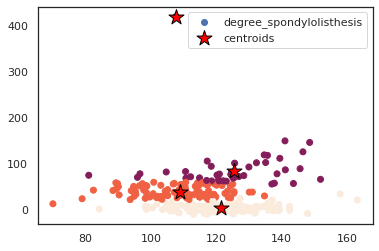

In [9]:
fig, ax = plt.subplots()
scatter = ax.scatter(x = 'pelvic_radius', y = 'degree_spondylolisthesis', c='cluster', data = X)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black',label='centroids')
plt.legend(scatterpoints=1)
plt.show()

In [10]:
X_new = X.drop(['cluster'], axis = 1)
parameters = ['single', 'average', 'complete', 'ward']
res_dict = {}
for parameter in parameters:
    Z = AgglomerativeClustering(n_clusters = 4, linkage = parameter).fit(X_new)
    res_dict[parameter]={'ARI': metrics.adjusted_rand_score(X['cluster'],Z.labels_ ),
        'AMI': metrics.adjusted_mutual_info_score(X['cluster'], Z.labels_),
        'Homogenity': metrics.homogeneity_score(X['cluster'], Z.labels_),
        'Completeness': metrics.completeness_score(X['cluster'], Z.labels_),
        'V-measure': metrics.v_measure_score(X['cluster'], Z.labels_),
        'Silhouette': metrics.silhouette_score(X, Z.labels_)}
res_dict
comparing = pd.DataFrame(res_dict)
comparing.T

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
single,0.015718,0.052404,0.039171,0.388452,0.071165,0.280410
average,0.105815,0.196068,0.132318,0.514580,0.210506,0.343363
complete,0.369798,0.462189,0.372294,0.639084,0.470501,0.507906
ward,0.862022,0.799805,0.820540,0.785020,0.802387,0.495933
